<a href="https://colab.research.google.com/github/snowandboard/social-media-addiction/blob/main/social_media_addiction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Media Addiction Classification using Machine Learning**

[Kaggle Dataset](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships?select=Students+Social+Media+Addiction.csv)


In [ ]:
import pandas as pd

csv_path = '/content/Students Social Media Addiction (1).csv'
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## **Step 1. Exploratory Data Analysis (EDA)**
Goal: Understand the structure, quality, and distribution of the data.

In [ ]:
print("the shape of the df is", df.shape)
print(df.dtypes)

the shape of the df is (705, 13)
Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object


In [ ]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

## **Step 2. Data Cleaning**

In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [ ]:
# Permanently lower case all columns

df.columns = df.columns.str.lower()
df.head()

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


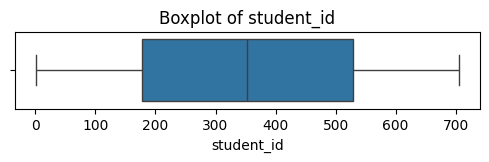

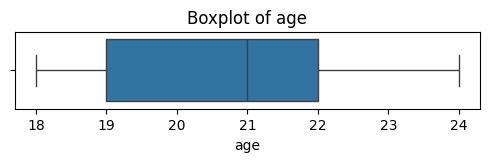

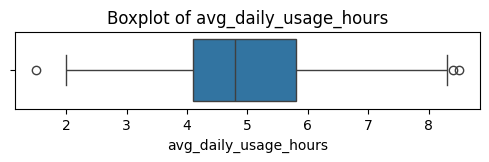

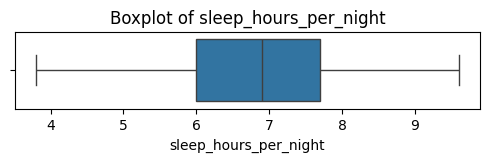

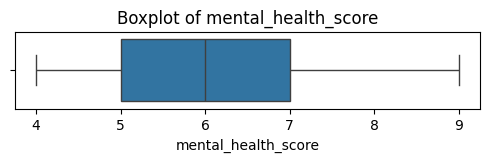

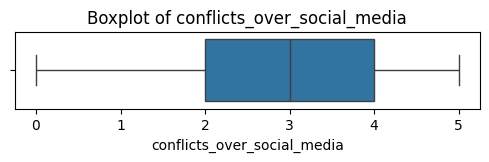

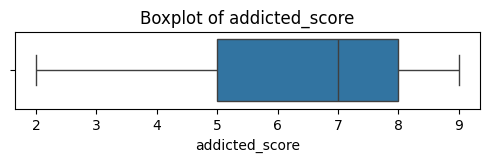

In [ ]:
# checking outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numeric columns and plot boxplots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [1]:
# To check the 2 outliers in avg_daily_usage_hours if its significance enough if its deleted

# Get bounds using IQR
col = 'avg_daily_usage_hours' # to make it easy being called
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df[col] >= lower) & (df[col] <= upper)]

# Compare stats
print("With outliers:\n", df[col].describe())
print("\nWithout outliers:\n", df_no_outliers[col].describe())

# since the difference is not that big, no need to be deleted

NameError: name 'df' is not defined

In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'country',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score'],
      dtype='object')

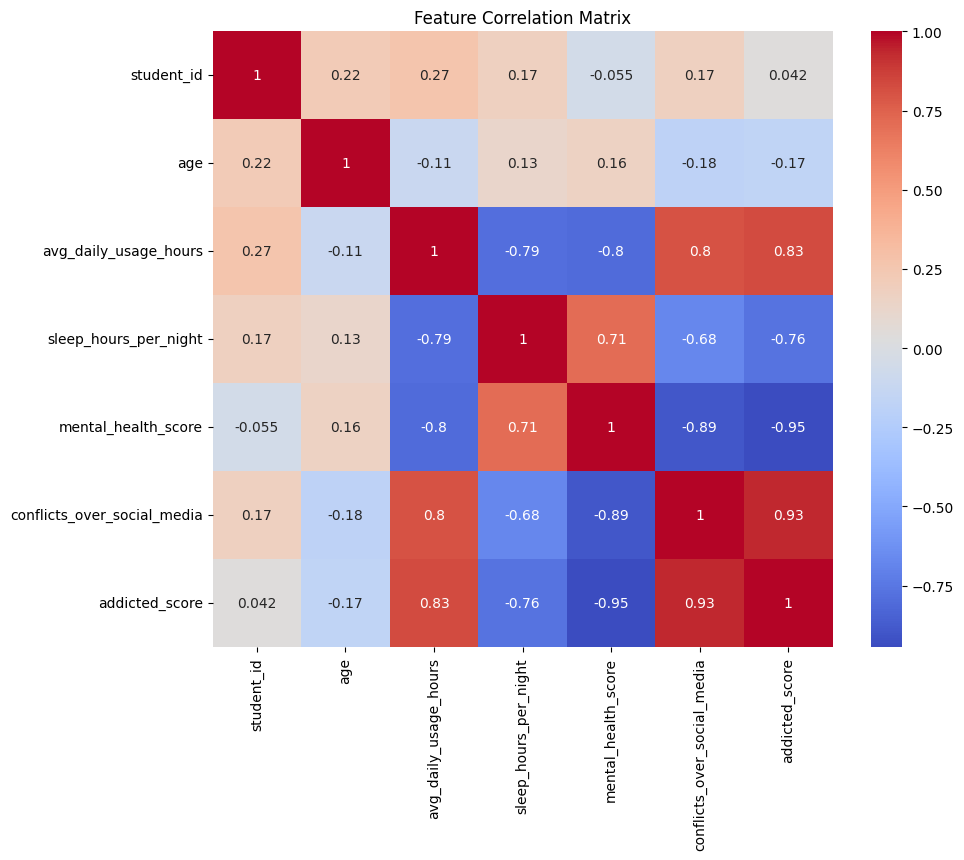

In [ ]:
# to see correlation between all columns

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)  # Only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


**strong correlation**

- avg daily usage hours , addicted score = 0.83 --> high social media usage is strongly associated with addiction

- mental health score , sleep hours per night = 0.71 --> better mental health aligns with more sleep

- conflicts over social media, addicted score = 0.93 --> more conflicts over social media strongly correlate with addiction


## **Step 3. Model Preparation**

- Split data into X (features) and y (target)
- Train/test split: train_test_split()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # untuk standarisasi (lihat catatan)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Making binary targe: addicted_score >=7 → 1, else 0
df['addicted_binary'] = (df['addicted_score'] >= 7).astype(int)

features = ['avg_daily_usage_hours', 'conflicts_over_social_media', 'sleep_hours_per_night', 'mental_health_score']
X = df[features] # feature
y = df['addicted_binary'] # target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Step 4. Modeling & Evaluation**


### **4.1 Binary Classification dengan Logistic Regression**

In [ ]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9716312056737588

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       0.95      1.00      0.98        79

    accuracy                           0.97       141
   macro avg       0.98      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141


Confusion Matrix:
 [[58  4]
 [ 0 79]]


* **Accuracy**: The model correctly predicted 97% of all test sample

* **Class 0 (Not Addicted):**
  * **Precision** = 1.00 → Of all the samples predicted as Not Addicted, 100% were truly not addicted.
  * **Recall** = 0.94 → Of all the samples that were actually Not Addicted, the model correctly identified 94% of them.

* **Class 1 (addicted):**
  * **Precision**: 0.95 → Of all the samples predicted as Addicted, 95% were truly addicted.
  * **Recall**: 1.00 → Of all the samples that were actually Addicted, the model correctly identified 100% of them.

* **Confusion Matrix**:
  * False Positives (FP) = 4 → The model incorrectly predicted 4 people as addicted who were actually not addicted.

  * False Negatives (FN) = 0 → No one who was actually addicted was predicted as not addicted.

### **4.2 Regression dengan Linear Regression**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

# KNN Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("KNN RMSE:", rmse_knn)
print("KNN R2:", r2_score(y_test, y_pred_knn))


Linear Regression RMSE: 0.25489301968845496
Linear Regression R2: 0.7362846986543161
Random Forest RMSE: 0.1646499025980031
Random Forest R2: 0.8899620728358514
KNN RMSE: 0.15064871543094188
KNN R2: 0.9078807676602695


Among the three models tested, K-Nearest Neighbors (KNN) demonstrated the highest prediction accuracy and smallest error, suggesting it is the most suitable model for predicting social media addiction scores in this dataset. This is supported by an R² of 0.91, meaning the model explains 91% of the variance in the target variable.

**1. Feature Importance for Random Forest**

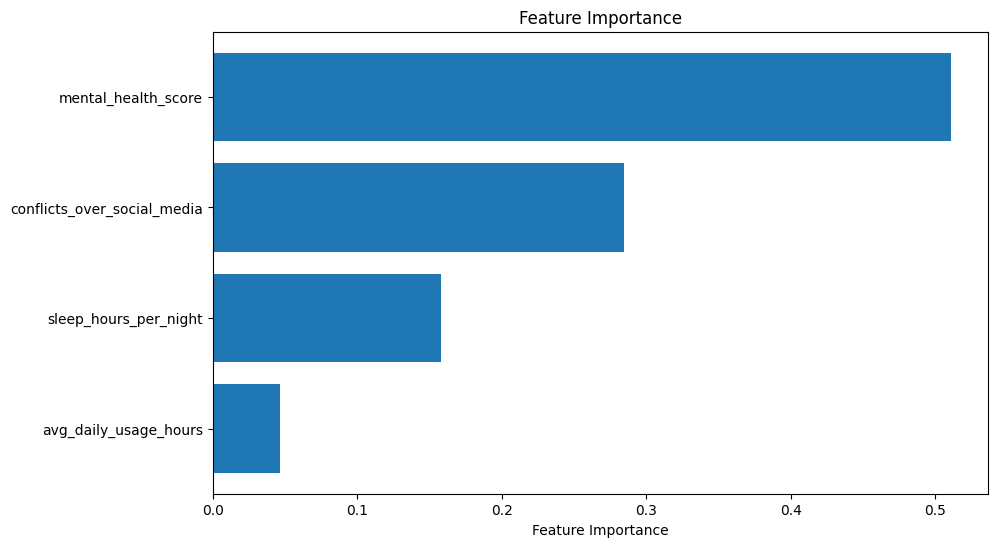

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Making Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
features = X.columns
indices = importances.argsort()

# Plot Feature Importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(len(features)), importances[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


**2. Feature Reference for Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make dan train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


# To see coefficient from Logistic Regression model
coefficients = lr_model.coef_[0]
features = X.columns

# To show coefficient and Feature
feature_coeffs = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients})

# Sort the result
feature_coeffs = feature_coeffs.sort_values(by='Coefficient', ascending=False)
print(feature_coeffs)


                       Feature  Coefficient
1  conflicts_over_social_media     1.593154
0        avg_daily_usage_hours     0.638159
2        sleep_hours_per_night    -0.472811
3          mental_health_score    -4.161616


**3. KNN feature reference**

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier  # For classification

# Define the KNN model with a specific number of neighbors (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using training data
knn_model.fit(X_train, y_train)

# Calcualte permutation importance for KNN
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Show importance for each feature
for feature, importance in zip(X_test.columns, result.importances_mean):
    print(f"{feature}: {importance}")


avg_daily_usage_hours: 0.024822695035460918
conflicts_over_social_media: 0.012056737588652399
sleep_hours_per_night: 0.008510638297872275
mental_health_score: 0.22056737588652475


## **Step 5: Final Summary**

### Modeling Results
- Best model: KNN (R2 = 0.90, RMSE = 0.15)

- Classification (logistic regression): Accuracy = 97%

### Feature Importance
- `mental_health_score`: consistently ranked high (KNN, Random Forest)

- `conflicts_over_social_media`: also significant across models

- `avg_daily_usage_hours`: highly correlated (r = 0.83)

### Insight
- Students with high social media conflicts and low mental health scores are most at risk.

- High daily usage is correlated but less consistently predictive across models.

### Policy Recommendation
- Provide mental health support for students with high screen time (counseling and physical activities recommendation)

- Monitor and reduce conflicts driven by social media overuse.
